# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+.

## 1. Введение.

**Цель проекта:**

разобраться в причинах убытков компании за последние несколько месяцев и помочь компании выйти в плюс.

**Данные для исследования:**

Компания предоставила данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Данные собраны в три датасет: 

- **visits_info_short.csv** хранит лог сервера с информацией о посещениях сайта,  
- **orders_info_short.csv** — информацию о заказах,   
- **costs_info_short.csv** — информацию о расходах на рекламу.  

Структура **visits_info_short.csv:**  
- **User Id** — уникальный идентификатор пользователя,  
- **Region** — страна пользователя,  
- **Device** — тип устройства пользователя,  
- **Channel** — идентификатор источника перехода,  
- **Session Start** — дата и время начала сессии,  
- **Session End** — дата и время окончания сессии.  

Структура **orders_info_short.csv:**  
- **User Id** — уникальный идентификатор пользователя,  
- **Event Dt** — дата и время покупки,  
- **Revenue** — сумма заказа.  

Структура **costs_info_short.csv:**
- **dt** — дата проведения рекламной кампании,  
- **Channel** — идентификатор рекламного источника,  
- **costs** — расходы на эту кампанию.  

**Задачи проекта:**  
выяснить следующие пункты:  
- откуда приходят пользователи и какими устройствами они пользуются;  
- сколько стоит привлечение пользователей из различных рекламных каналов;  
- сколько денег приносит каждый клиент;  
- когда расходы на привлечение клиента окупаются; 
- какие факторы мешают привлечению клиентов;
- Описание данных.

## 2. Загрузка данных и их подготовка к анализу

Загружаем библиотеки:

In [75]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

Загружаем данные:

In [76]:
visits = pd.read_csv('C:\\Users\\77281\\Downloads\\visits_info_short.csv')
orders = pd.read_csv('C:\\Users\\77281\\Downloads\\orders_info_short.csv')
costs = pd.read_csv('C:\\Users\\77281\\Downloads\\costs_info_short.csv')

Изучим данные о визитах:

In [77]:
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

Названия колонок приведем к правильному стилю:

In [78]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
visits.head()

user_id         region   device  channel        session_start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

Изучим информацию о датафрейме. Запомним, что данные о времени нужно перевести из типа object к типу datetime:

In [79]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Проверяем на пропуски:

In [80]:
visits.isna().mean()

user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64

Пропусков не обнаружено.

Проверяем на дубликаты:

In [81]:
visits.duplicated().sum()

0

Проверяем на неявные дубликаты:

In [82]:
print(visits['region'].unique())
print(visits['device'].unique())
print(visits['channel'].unique())

['United States' 'UK' 'France' 'Germany']
['iPhone' 'Mac' 'Android' 'PC']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


Неявных дубликатов не выявлено, все значения уникальные.

Изучим данные о заказах:

In [83]:
orders.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [84]:
orders.columns = ['user_id', 'event_dt', 'revenue']
orders.head()

user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [85]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [86]:
orders.isna().mean()

user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64

Пропусков не обнаружено.

In [87]:
orders.duplicated().sum()

0

Явных дубликатов нет.

Изучим данные о затратах:

In [88]:
costs.head()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [89]:
costs.columns = map(str.lower, costs.columns)
costs.head()

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [90]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [91]:
costs.isna().mean()

dt         0.0
channel    0.0
costs      0.0
dtype: float64

In [92]:
costs.duplicated().sum()

0

In [93]:
print(costs['channel'].unique())

['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


Неявных дубликатов не выявлено, все значения уникальные

Данные прошли проверку на наличие пропусков и дубликатов. 

Перед началом анализа проведем преобразование столбцов с данными времени.

In [94]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [95]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


## 3. Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Используем функции, написанные ранее.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [96]:
import time
from datetime import datetime
from datetime import date, timedelta as td

observation_date = datetime(2019, 11, 1).date() # момент анализа
horizon_days = 14 # горизонт анализа

In [97]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [98]:
#функция для подсчета удержания
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа 
    # тех, которые присоединились позже, чем observation_date - horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим «треугольную таблицу» 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к «треугольной» таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждую «ячейку» на соответствующий размер когорты и получаем retention rate
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # исключаем все лайфтаймы, превышающие горизонт анализа
        result['cohort_size'] = cohort_sizes                                                                     # восстанавливаем размеры когорт
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем обе таблицы и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped, result_in_time

In [99]:
#функция для подсчета конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [100]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [101]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [102]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [103]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 
# функция для визуализации LTV и ROI



In [104]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Вывод:
необходимые функции, момент и горизонт анализа заданы.

## 4. Исследовательский анализ данных

### 4.1. Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

Получаем профили пользователей:

In [108]:
profiles = get_profiles(visits, orders, costs)
print(profiles.head())

    user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769  


In [109]:
profiles['dt'] = profiles['first_ts'].dt.date
profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

In [110]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() 
print(min_analysis_date)
print(observation_date)

2019-05-01 00:00:00
2019-10-27 00:00:00


Минимальная дата привлечения пользователей - 1 мая 2019 года.

Максимальная дата привлечения пользователей - 27 октября 2019 года.

***Вывод:***    
даты начала и окончания периода привлечения пользователей в ТЗ и в предоставленных таблицах совпадают, что говорит о хорошем качестве данных.

### 4.2. Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [111]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [112]:
region = pd.DataFrame()
region['users'] = profiles.groupby('region')['user_id'].count()
region['payer_users'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region['share'] = (region['payer_users'] / region['users'])*100
region.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

Вывод: Пользователи приложения приходят из четырех стран: США, Великобритании, Франции и Гепмании. Больше всего платящих пользователей в США - 6902 пользователей. По доле платящих пользователей так же лидирует США(6.9%).Доля платящих пользователей в других странах - Германия(4.1%), Великобритания(4%), Франция(3.8%)

### 4.3. Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [113]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [114]:
device = pd.DataFrame()
device['users'] = profiles.groupby('device')['user_id'].count()
device['payer_users'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device['share'] = (device['payer_users']*100 / device['users'])
device.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

***Вывод:***  
клиенты пользуются устройствами iPhone, Android, PC и Mac. Платящих пользователе больше всего среди использующих iPhone - 3382 пользователя. На втором месте - пользователи Android - 2050 пользователей, на третьем месте пользователи Mac - 1912 пользователей. Самая высокая доля платящих пользователей в общем количестве пользователей у Mac и iPhone - 6,4% и 6,2% соответственно.

### 4.4. Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [115]:
channel = pd.DataFrame()
channel['users'] = profiles.groupby('channel')['user_id'].count()
channel['payer_users'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel['share'] = (channel['payer_users'] / channel['users'])*100 
channel.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

Вывод: Пользователи привлекаются через десять платных источников, а так же бесплатно через органику. Больше всего платящих пользователей пришло через FaceBoom(3557 пользователей), TipTop(1878 пользователей) и organic(1160 пользователей). Самая высокая доля платящих пользователей у канала FaceBoom (12,2%), а так же у AdNonSense(11,3%) и lambdaMediaAds(10,5%).

## 5. Маркетинг

### 5.1. Посчитаем общую сумму расходов на маркетинг.

In [116]:
costs.head()

dt   channel  costs
0 2019-05-01  FaceBoom  113.3
1 2019-05-02  FaceBoom   78.1
2 2019-05-03  FaceBoom   85.8
3 2019-05-04  FaceBoom  136.4
4 2019-05-05  FaceBoom  122.1

In [117]:
channel_costs = pd.DataFrame()
channel_costs['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs.sort_values(by='costs', ascending=False)

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

In [118]:
costs['costs'].sum().round()

105497.0

***Вывод:***  
Общая сумма затрат на маркетинг 105497. Больше всего потрачено на канал TipTop(54751.3) и FaceBoom(32445.6).

### 5.2. Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

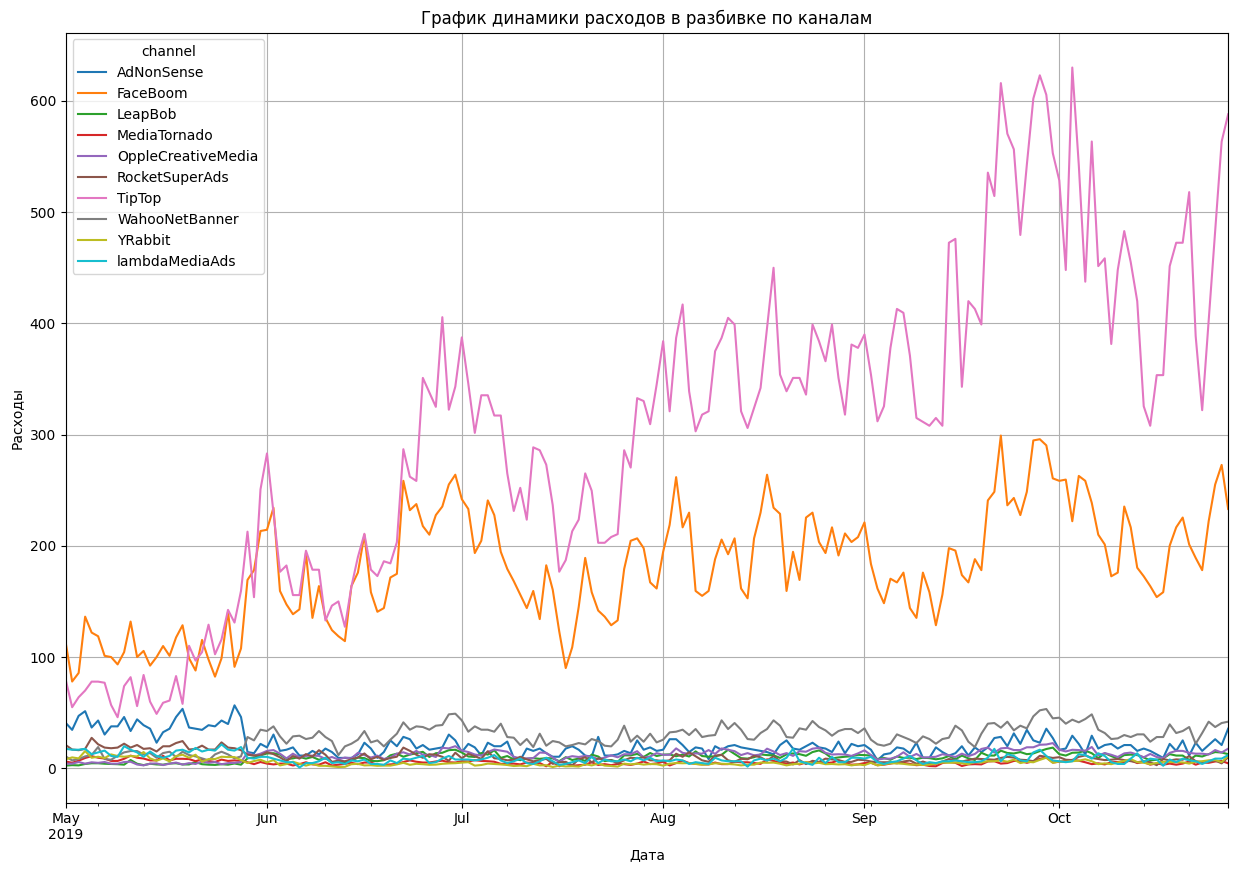

In [119]:
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(15, 10),
           grid=True,)

plt.title('График динамики расходов в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

***Вывод:***   
Наблюдаем рост расходов для двух каналов - TipTop и FaceBoom. Причем для канала FaceBoom рост более сильный, чем для канала Faceboom. В первые две декады мая расходы на TipTop были ниже, но в начале третьей декады мая рост этих расходов увеличился и с того момента динамика расходов на TipTop опережает FaceBoom. По остальным восьми рекламным каналам динамики не наблюдаем.

### 5.3. Используя профили пользователей, узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

Расчитаем стоимость привлечения пользователя в целом по проекту.

In [120]:
costs['costs'].sum() / visits['user_id'].nunique()

0.703277825182657

Рассчитаем стоимость привлечения пользователя с разбивкой по рекламным каналам.

In [121]:
cac_by_channel = pd.DataFrame()
# уберём органических пользователей:
profiles = profiles.query('channel != "organic"')
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

***Вывод:***  
Обращает внимание факт, что стоимость привлечения через TipTop в четыре раза выше, чем средняя по проекту. А САС для каналов LeapBob, MediaTornado, YRabbit и OppleCreativeMedia наоборот, значительно( в три раза) ниже средней.

## 6. Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### 6.1.  Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

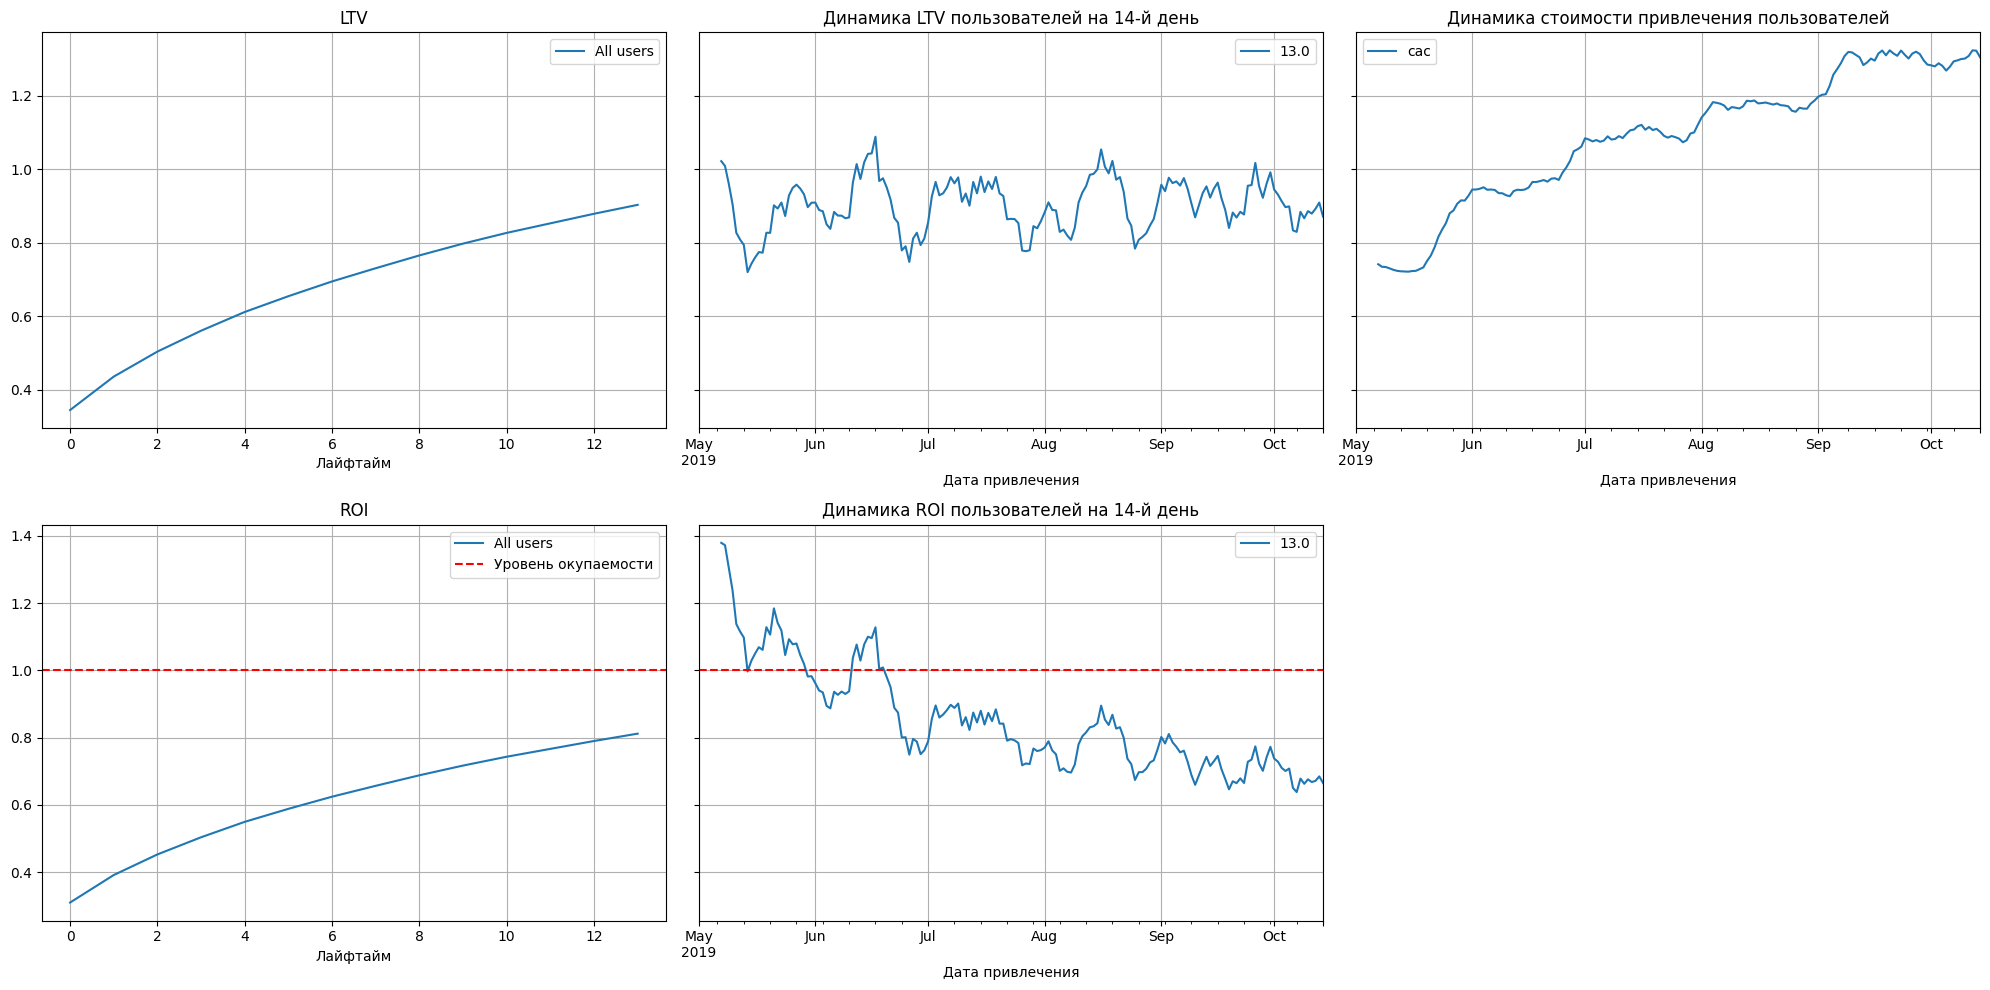

In [122]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

 ***Вывод:***   
 - Реклама не окупается, в конце второй недели ROI чуть выше 80%
 - Динамика окупаемости падает. Период окупаемости был в мае и около десяти дней в июне. С конца июня и далее окупаемость ушла в минус и продолжила падение до конца исследуемого периода.
 - САС растет - в конце исследуемого периода стоимость привлечения выросла в два раза по сравнению с началом. Стоит обратить внимание на размер рекламного бюджета.
 - LTV и динамика LTV стабильны, с качеством привлеченных пользователей проблем не выявлено.
 - Необходимо исследование, почему растет стоимость привлечения и падает окупаемость, причем в пропорциональной зависимости?
 

### 6.2. Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

Посмотрим конверсию с разбивкой по странам:

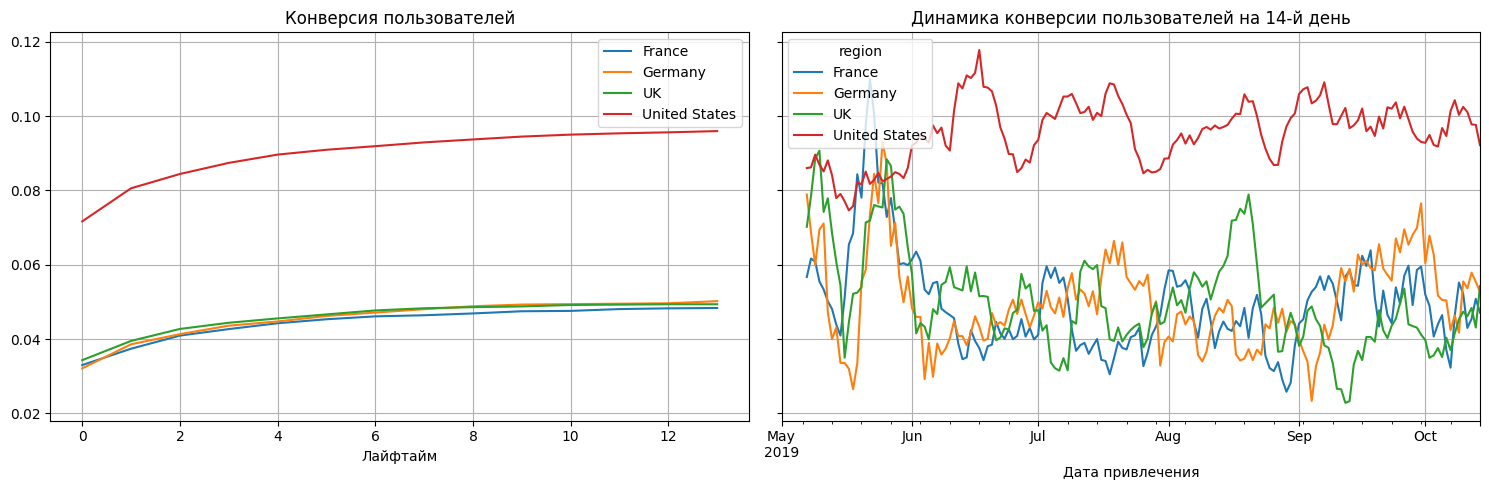

In [123]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

***Вывод:***
- Ярко выражено, что конверсия для США выше, чем у других стран - на конец второй недели выше 95%, в то время как у прочих стран конверсия выходит только на уровень 50%.
- В динамике конверсии есть некоторые перепады, но в целом они не оказывают особого влияния.

Посмотрим конверсию с разбивкой по устройствам:

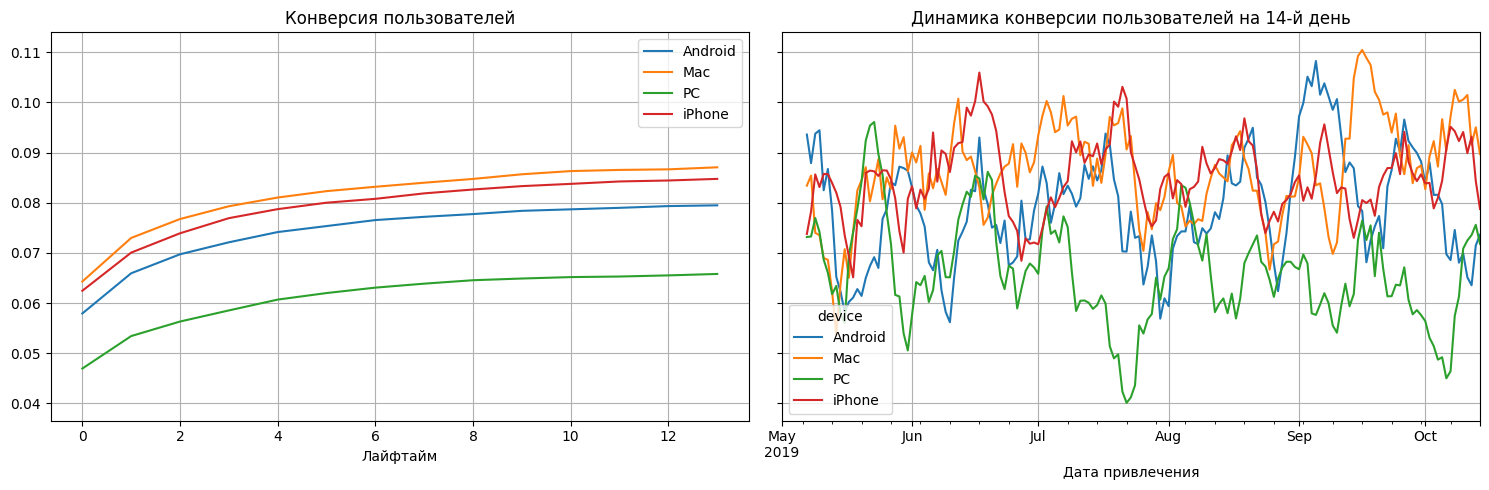

In [124]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

***Вывод:***
- Самую низкую конверсию показывают пользователи на PC(до 65% в конце второй недели), самую высокую - пользователи на Mac и iPhone (до 85%), с легким отставанием (около 80%) идут пользователи на Android. 
- Динамика конверсии по всем устройствам достаточно стабильная, особых замечаний нет.

Посмотрим конверсию с разбивкой по источникам:

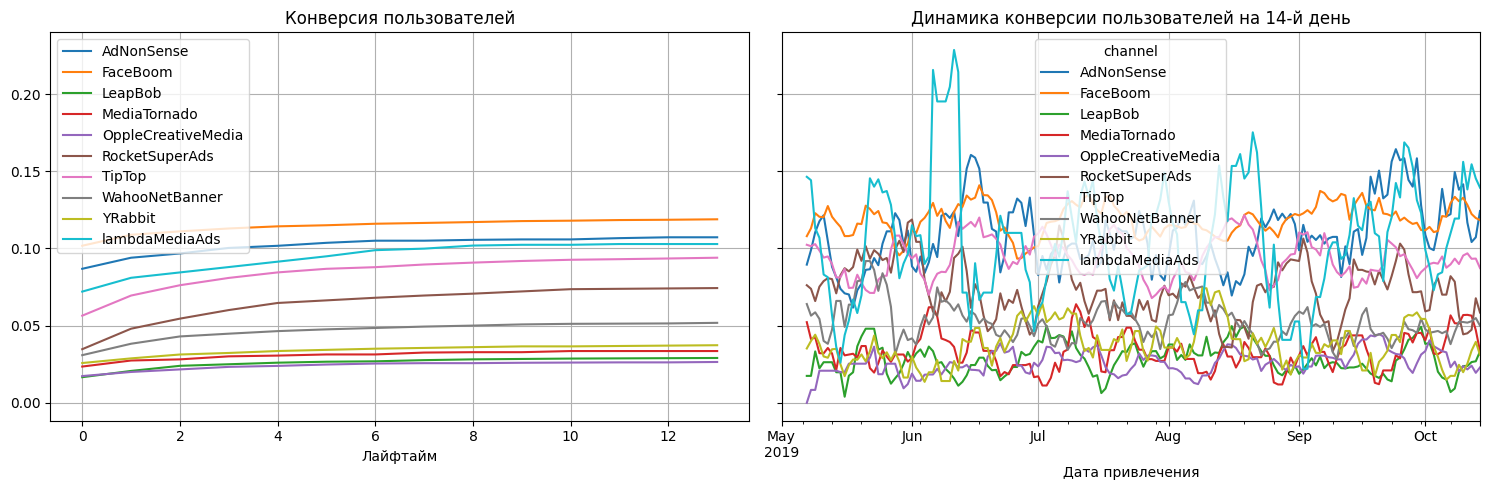

In [125]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

***Вывод:***   

По источникам привлечения можно выделить три группы:
- с низкой конверсией (ниже 0.05) - OppleCreativeMedia, LeapBob, MediaTornado, YRabbit
- со средней конверсией (от 0.05 до 0.10) - WahooNetBanner, RocketSuperAds, TipTop
- с высокой конверсией (выше 0.10) - LambdaMediaAds, AdNonSense, FaceBoom
Динамика достаточно стабильная для всех источников.

Посмотрим удержание с разбивкой по странам:

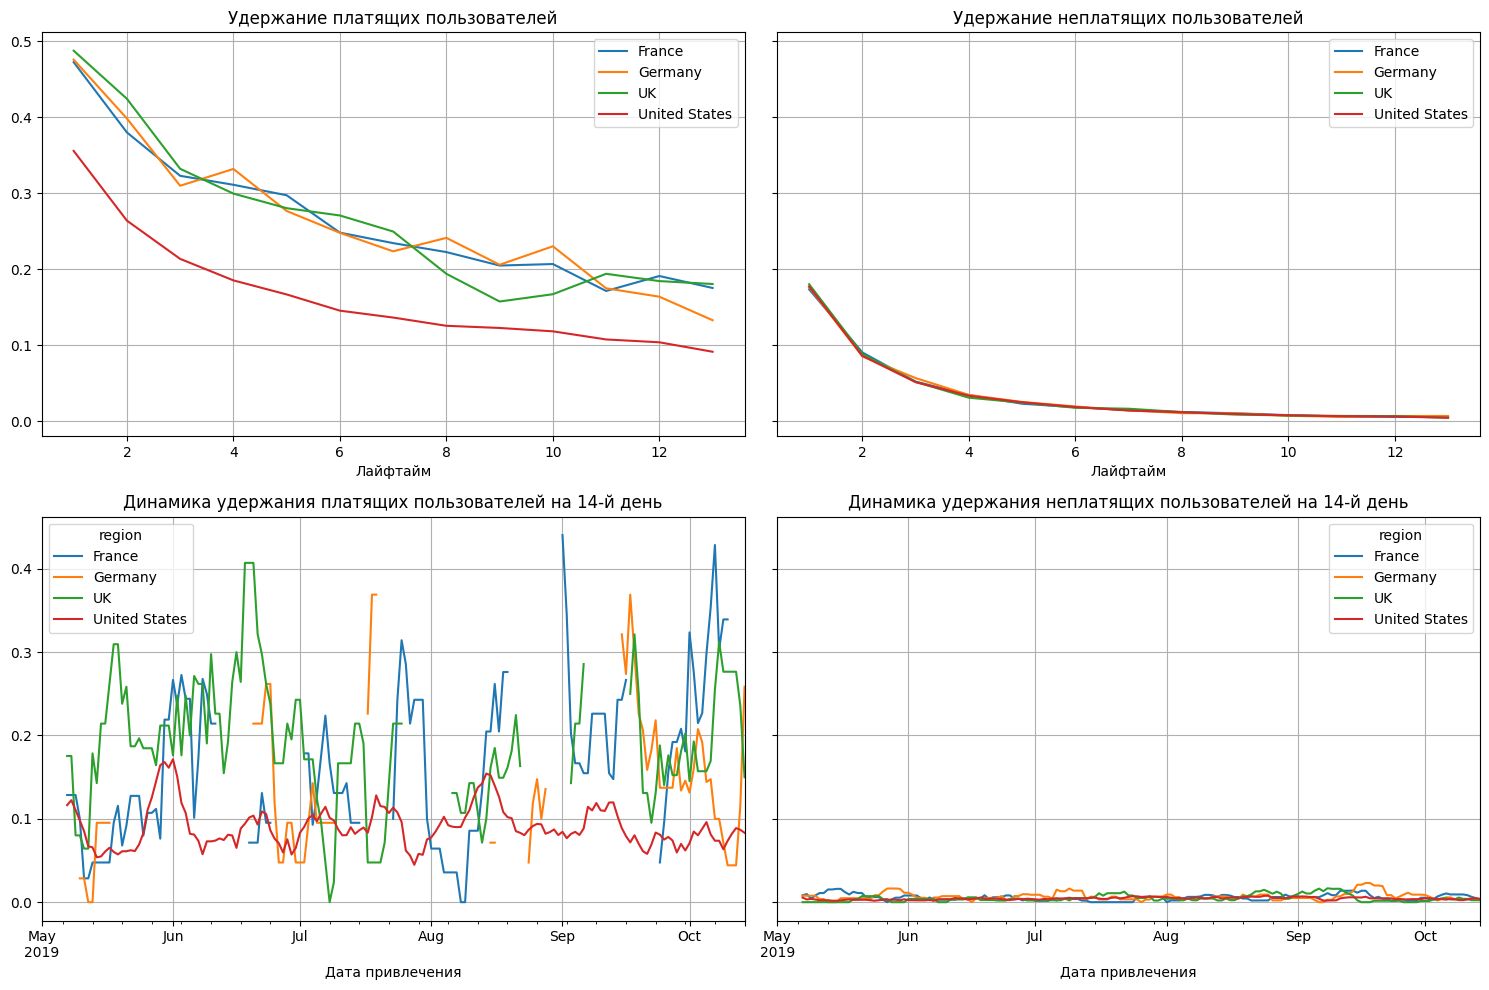

In [126]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

***Вывод:***   
удержание платящих клиентов в США ниже, чем в прочих странах. Остальные показатели в норме.

Посмотрим удержание с разбивкой по устройствам:


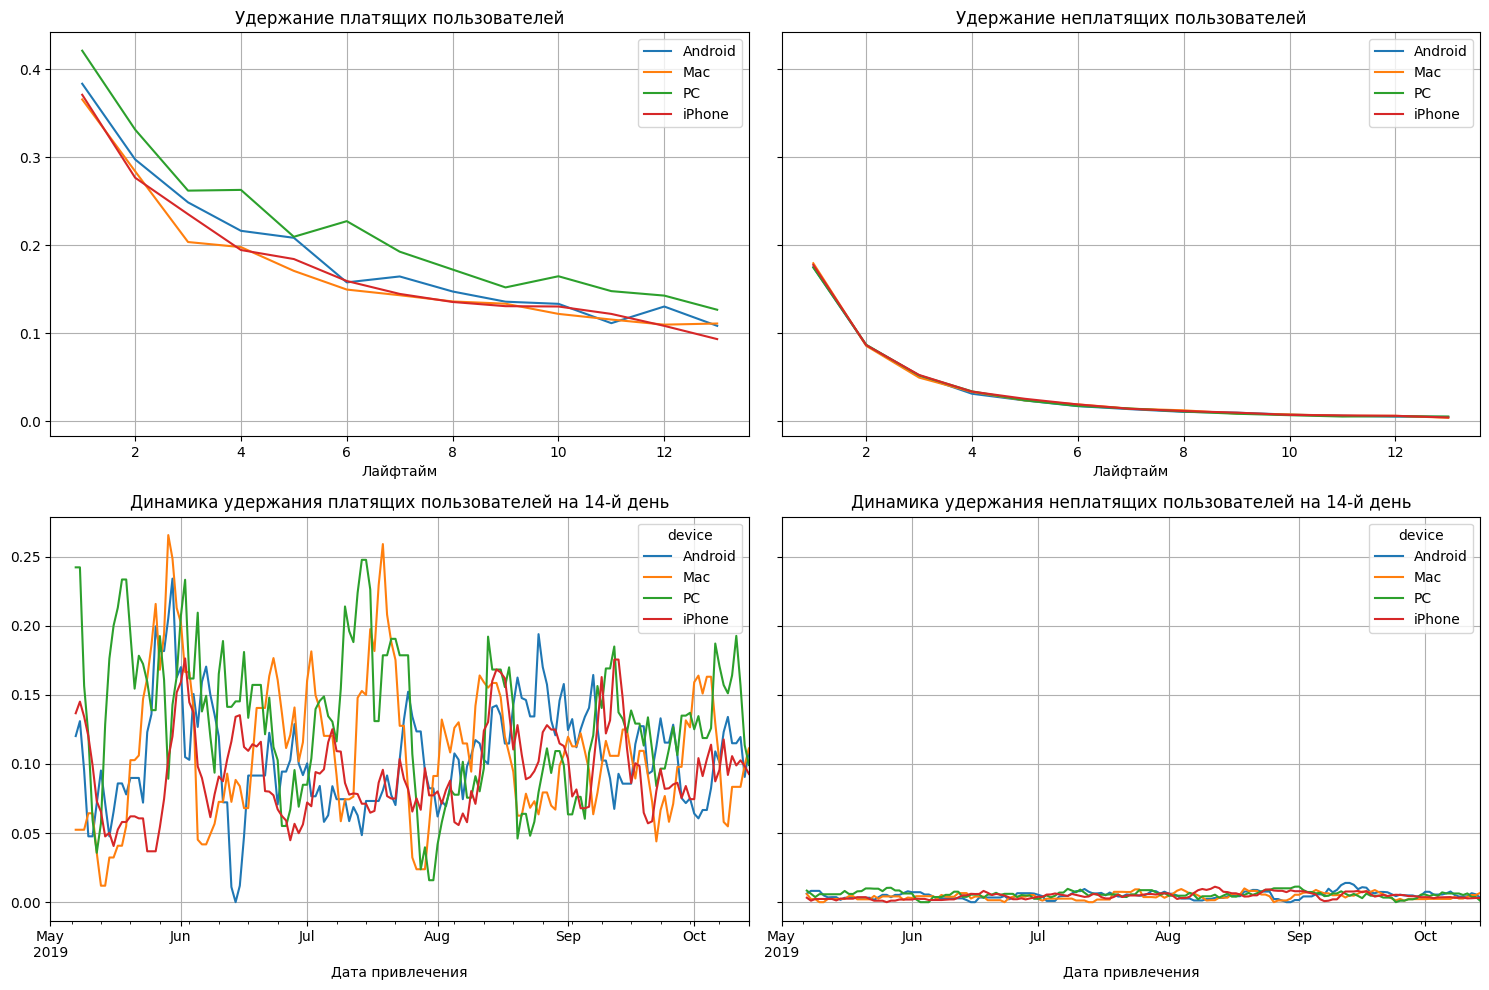

In [127]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

***Вывод:***   
проблем с удержанием пользователей не выявлено. Для платящих пользователей удержание несколько выше для PC, остальные устройства показывают примерно одинаковые результаты. Для неплатящих пользователей различия в удержании в зависимости от типа устройства не обнаружены. Динамика удержания стабильная как для платящих, так и для неплатящих пользователей.

Посмотрим удержание с разбивкой по источникам:

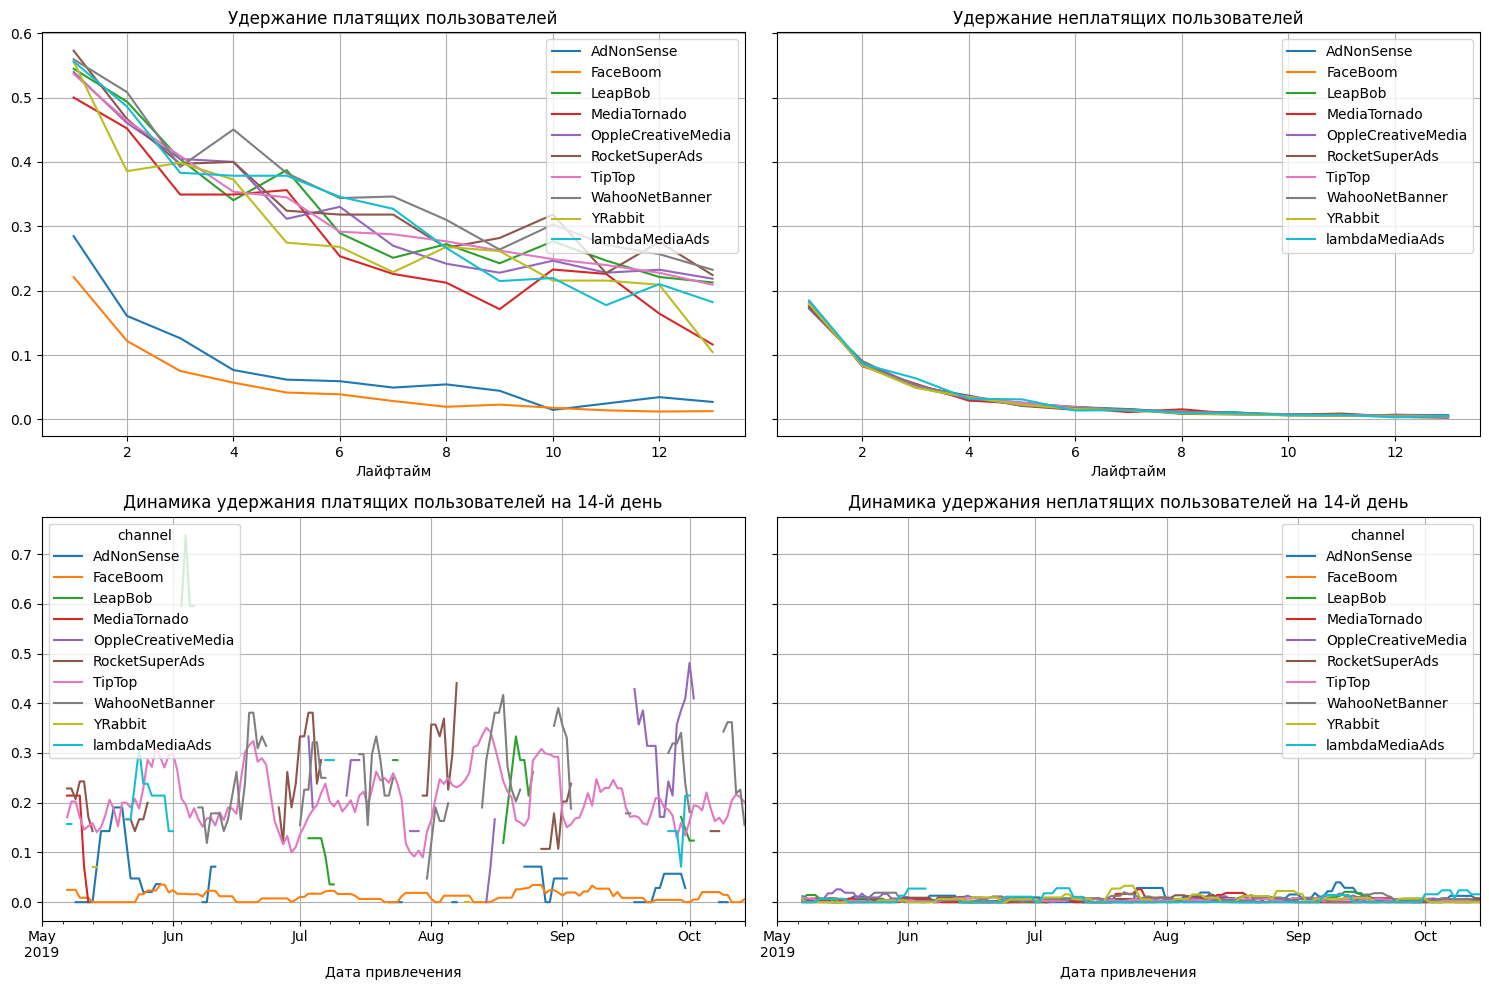

In [128]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

***Вывод:***  
два канала показывают низкое удержание платящих пользователей - FaceBoom и AdNonSense.

### 6.3. Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Посмотрим окупаемость с разбивкой по устройствам:


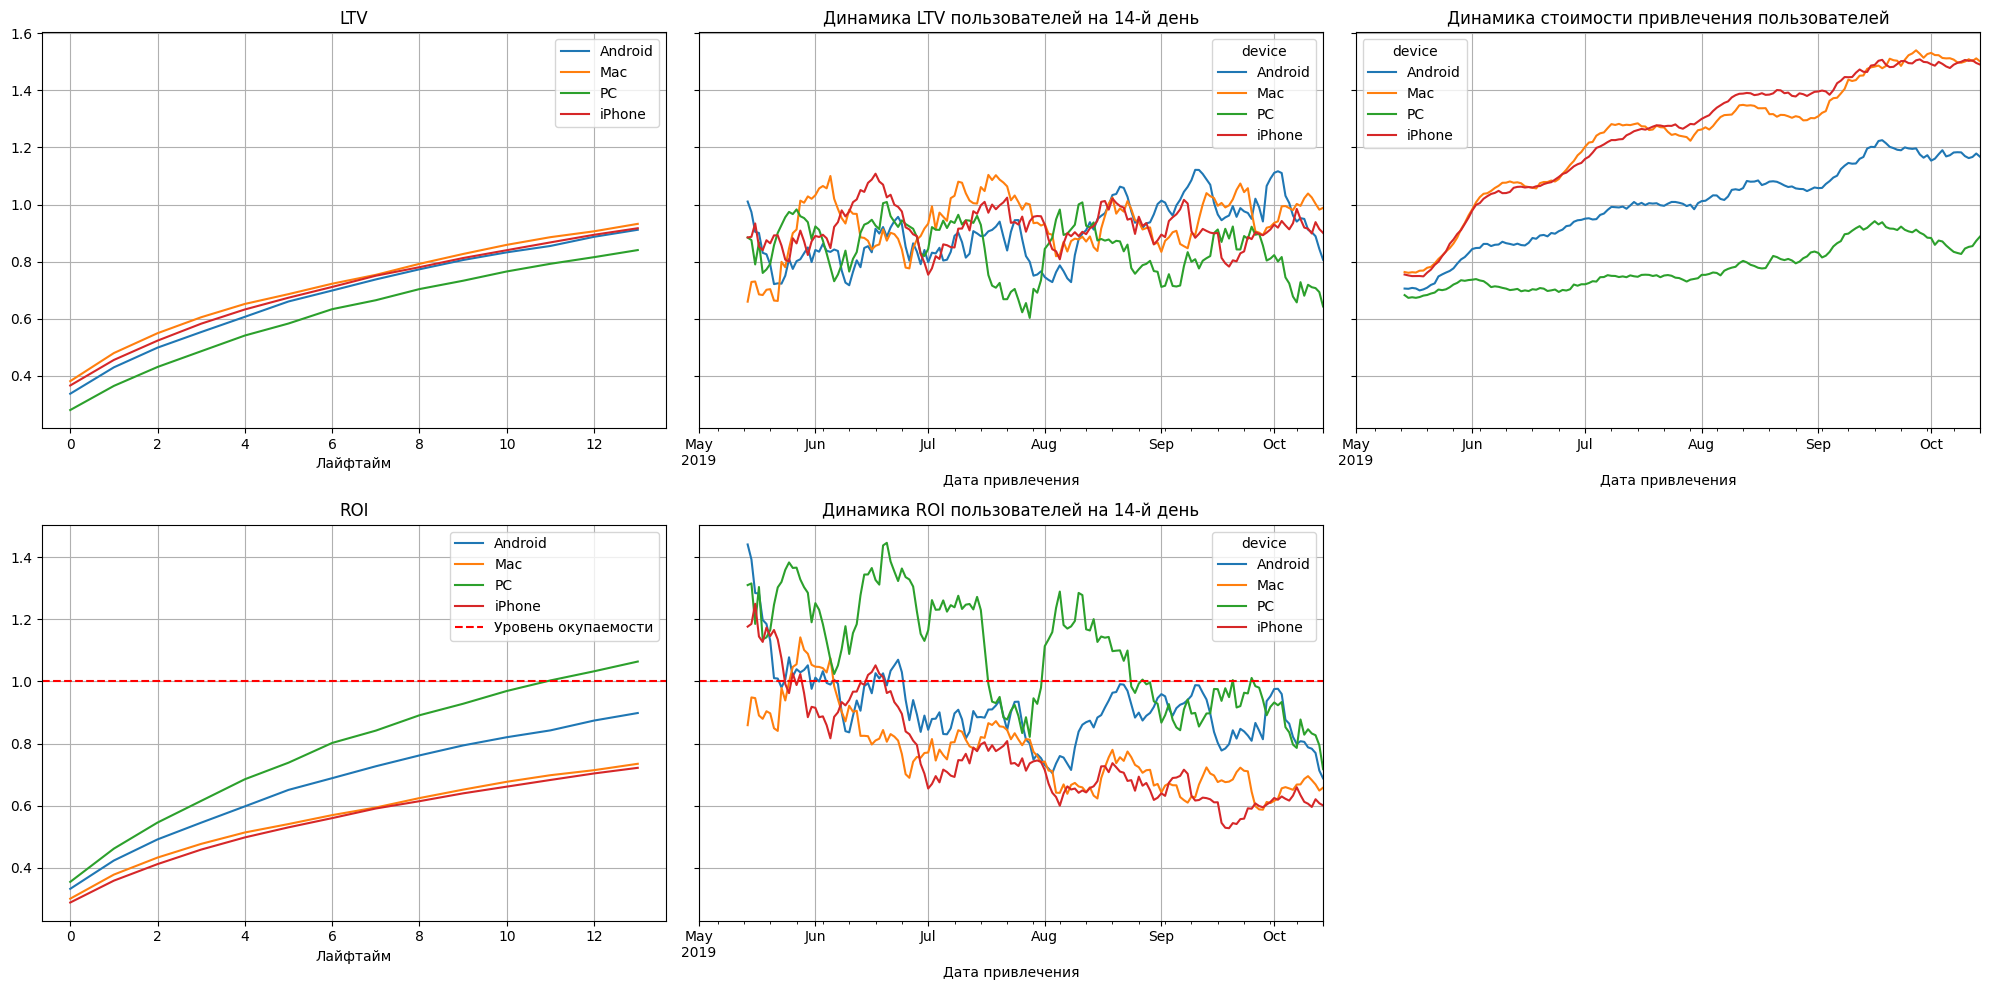

In [129]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

***Вывод:***  
- Реклама окупается только для PC, остальные показатели для PC - динамика LTV достаточно стабильна, стоимость привлечения к концу второй недели незначительно растет, динамика ROI медленно снижается.
- Для устройств на Android ROI к концу второй недели 0.9, динамика LTV стабильная, но стоимость привлечения растет, а ROI медленно падает. Прогноз выхода на окупаемость неблагоприятный.
- Для Mac и iPhone реклама далека от окупаемости, при этом стоимость привлечения постоянно растет, а динамика окупаемости постоянно падает.

### 6.4. Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Посмотрим окупаемость с разбивкой по странам:

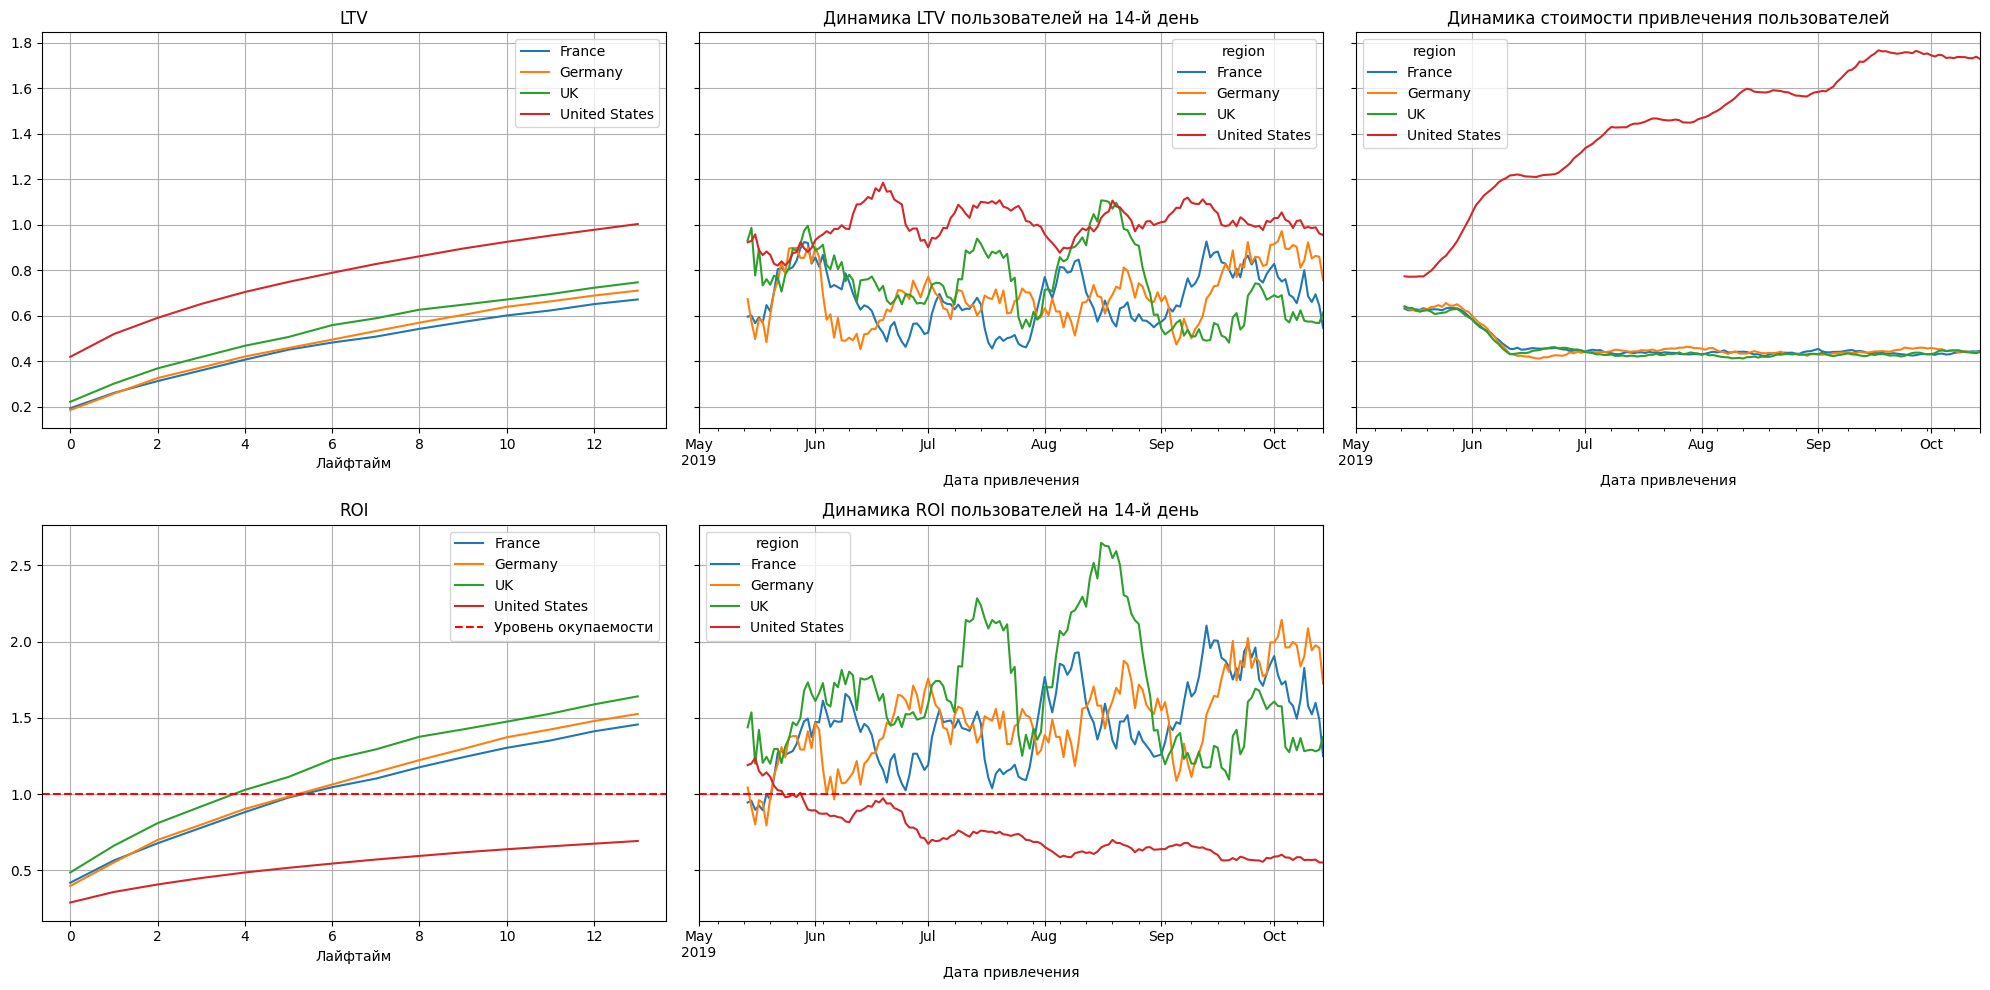

In [130]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

***Вывод:***   
- реклама на США не окупается, в отличие от других стран, которые дают хорошие показатели. Прогноз для окупаемости рекламы в США неблагоприятный, стоимость привлечения постоянно растет на протяжении всего периода исследования, а динамика ROI идет в минус. Рекомендуется рассмотреть вопрос о целесообразности рекламировать приложение в США.

### 6.5. Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Посмотрим окупаемость с разбивкой по источникам:

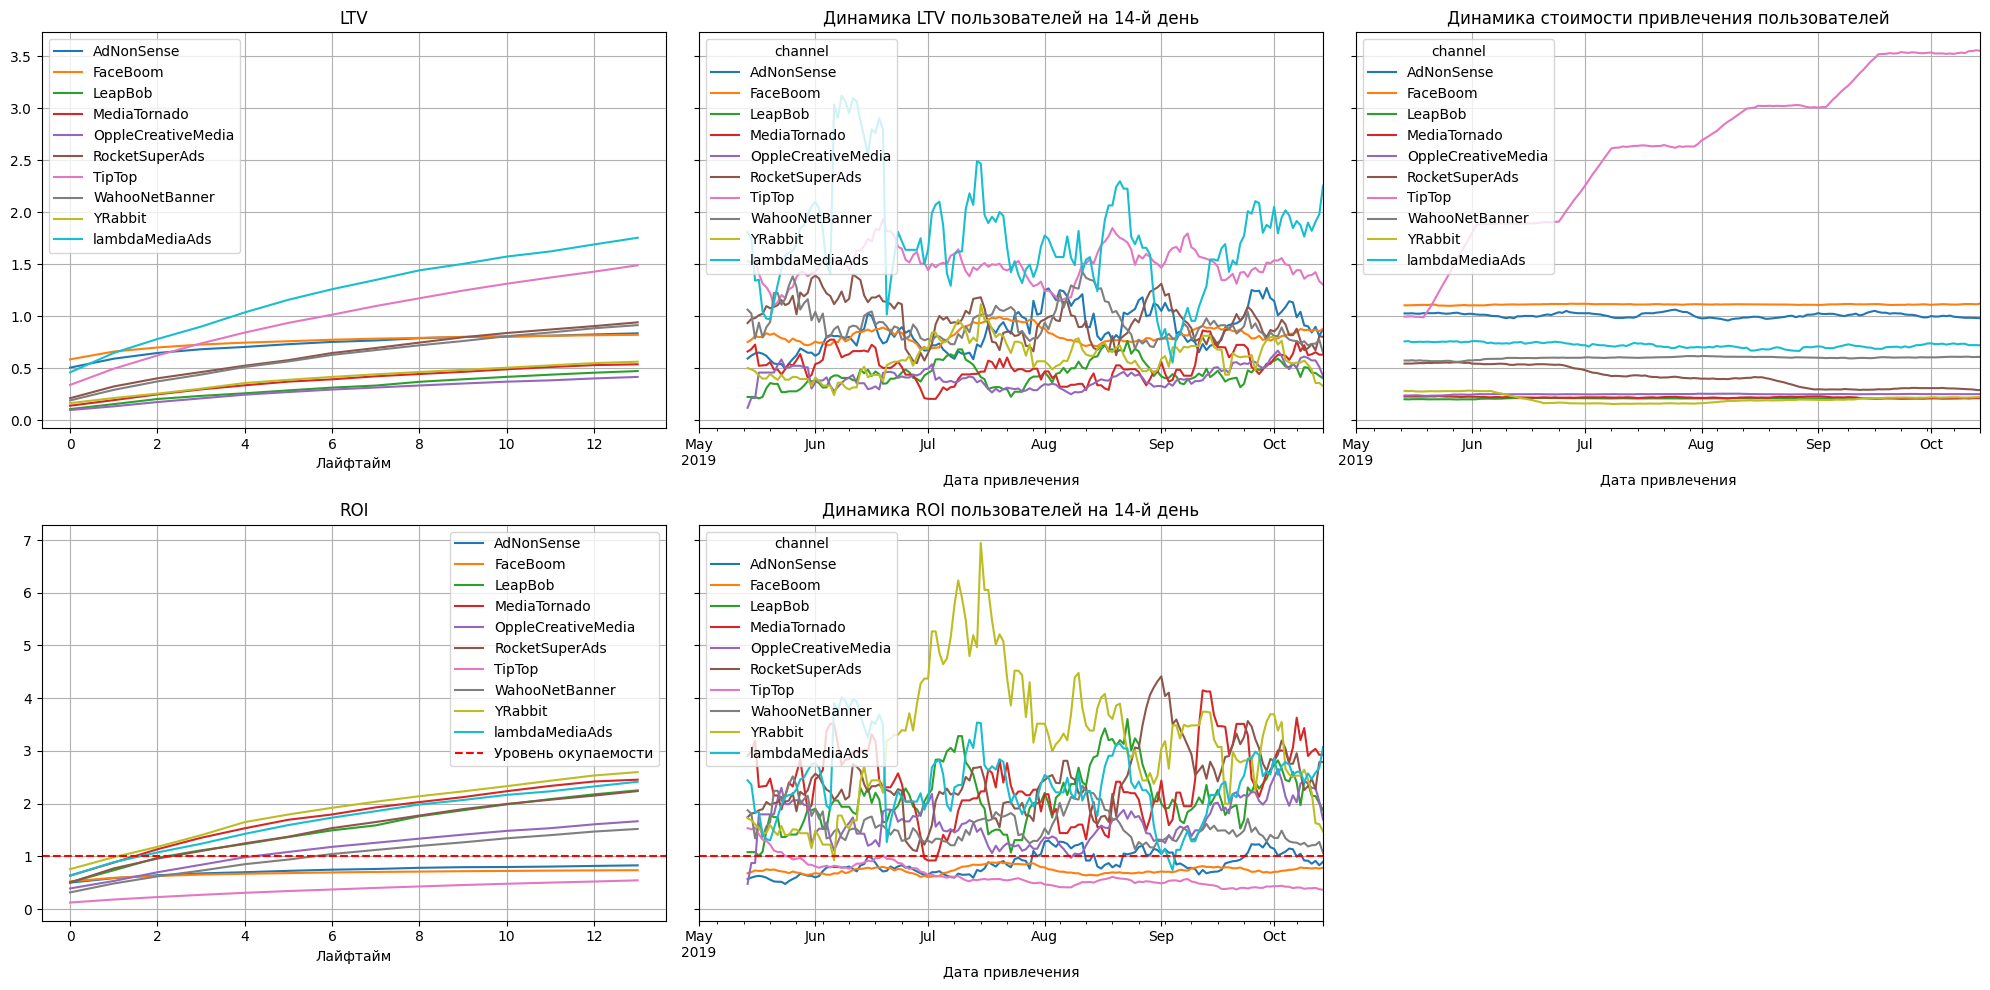

In [131]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

***Вывод:***   
Реклама не окупается для трех каналов - TipTop, FaceBoom и AdNonSense. При этом канал TipTop выделяется скачкообразным повышением стоимости привлечения каждый месяц, возможно рекламодатель постоянно проводит повышение тарифов. 

### 6.6. Дополнительно сравним показатели приложения в США и в целом по Европе.

Переименуем столбцы Germany, France и UK в Europe:

In [132]:
visits.replace({'region' : { 'France' : 'Europe', 'Germany' : 'Europe', 'UK' : 'Europe'}})

user_id         region   device         channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775         Europe       PC         LeapBob   
309897  334903592310         Europe       PC  lambdaMediaAds   
309898  540102010126         Europe       PC         organic   
309899  308736936846         Europe      Mac         organic   
309900  109329042535         Europe       PC  lambdaMediaAds   

             session_start         session_end  
0      2019-05-01 02:36:01 2019-05-01 02:45:01  
1      2019-05-01 04:46:31 2019-05-01 04:47:35  
2      2019-05-01 14:09:25 2019-05-01 15:32:08  
3      2019-05-01 00:29:59 2019-05-01 00:54:25  
4      2019-05-01 03:33:35 2019-05-01 03:57:40  
...                    ...                 ...  
309896 2019-10-31 13:28:12 2019-10-31 14:39:29  
309897 2019-10-31 22:14:52 2019-10-31 22:39:36  
309898 2019-10-31 01:40:48 2019-10-31 01:41:31  
309899 2019-10-31 07:37:34 2019-10-31 07:37:55  
309900 2019-10-31 14:17:43 2019-10-31 15:17:04  

[309901 rows x 6 columns]

Переименуем столбцы Germany, France и UK в Europe:

In [133]:
profiles.replace({'region' : { 'France' : 'Europe', 'Germany' : 'Europe', 'UK' : 'Europe'}})

user_id            first_ts       channel   device  \
0             599326 2019-05-07 20:58:57      FaceBoom      Mac   
1            4919697 2019-07-09 12:46:07      FaceBoom   iPhone   
3           22593348 2019-08-22 21:35:48    AdNonSense       PC   
4           31989216 2019-10-02 00:07:44       YRabbit   iPhone   
7           46006712 2019-06-30 03:46:29    AdNonSense  Android   
...              ...                 ...           ...      ...   
149999  999942424543 2019-05-24 21:03:26        TipTop   iPhone   
150001  999949280903 2019-08-12 06:47:27      FaceBoom      Mac   
150003  999956196527 2019-09-28 08:33:02        TipTop   iPhone   
150005  999976332130 2019-07-23 02:57:06        TipTop   iPhone   
150006  999979924135 2019-09-28 21:28:09  MediaTornado       PC   

               region         dt      month  payer  acquisition_cost  
0       United States 2019-05-07 2019-05-01   True          1.088172  
1       United States 2019-07-09 2019-07-01  False          1.107237  
3              Europe 2019-08-22 2019-08-01  False          0.988235  
4       United States 2019-10-02 2019-10-01  False          0.230769  
7              Europe 2019-06-30 2019-06-01   True          1.008000  
...               ...        ...        ...    ...               ...  
149999  United States 2019-05-24 2019-05-01  False          1.900000  
150001  United States 2019-08-12 2019-08-01  False          1.117838  
150003  United States 2019-09-28 2019-09-01  False          3.500000  
150005  United States 2019-07-23 2019-07-01  False          2.600000  
150006  United States 2019-09-28 2019-09-01  False          0.205714  

[93569 rows x 9 columns]

In [134]:
region = pd.DataFrame()
region['users'] = profiles.groupby('region')['user_id'].count()
region['payer_users'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region['share'] = (region['payer_users'] / region['users'])*100
region.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

***Вывод:***   
США показывают прекрасный результат, доля платящих пользователей почти в два раза выше, чем в Европе. 

Посмотрим конверсию с разбивкой по странам:

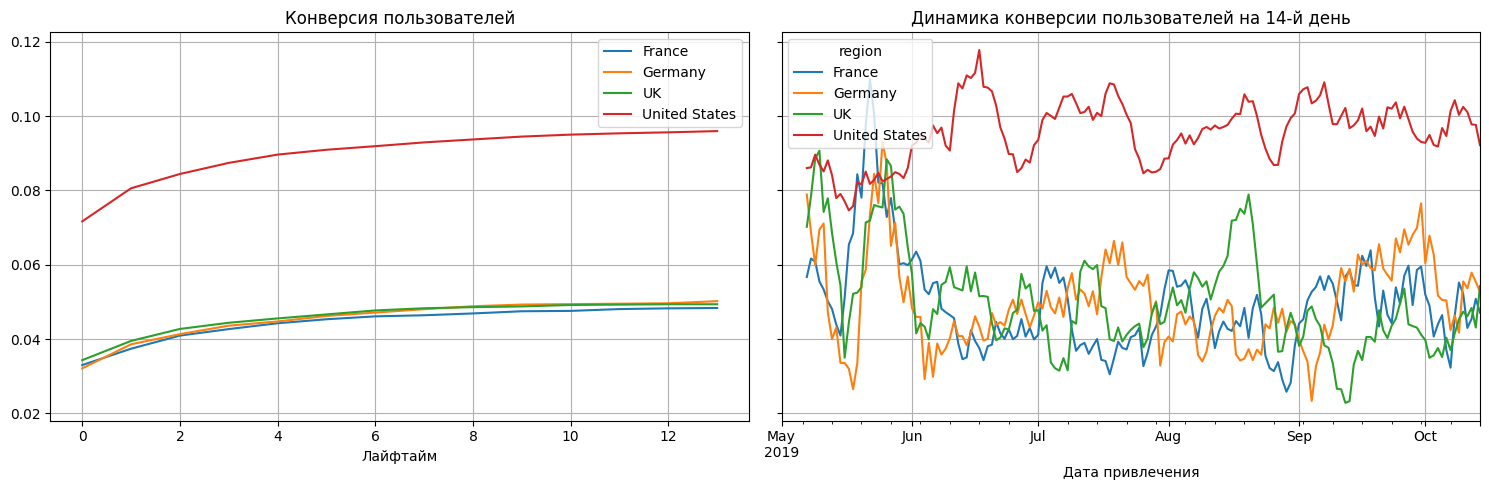

In [135]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

***Вывод:***   
По показателю конверсии в США тоже все прекрасно - конверсия так же почти в два раза выше, чем в Европе.

In [136]:
Посмотрим удержание с разбивкой по странам:

SyntaxError: invalid syntax (1006169414.py, line 1)

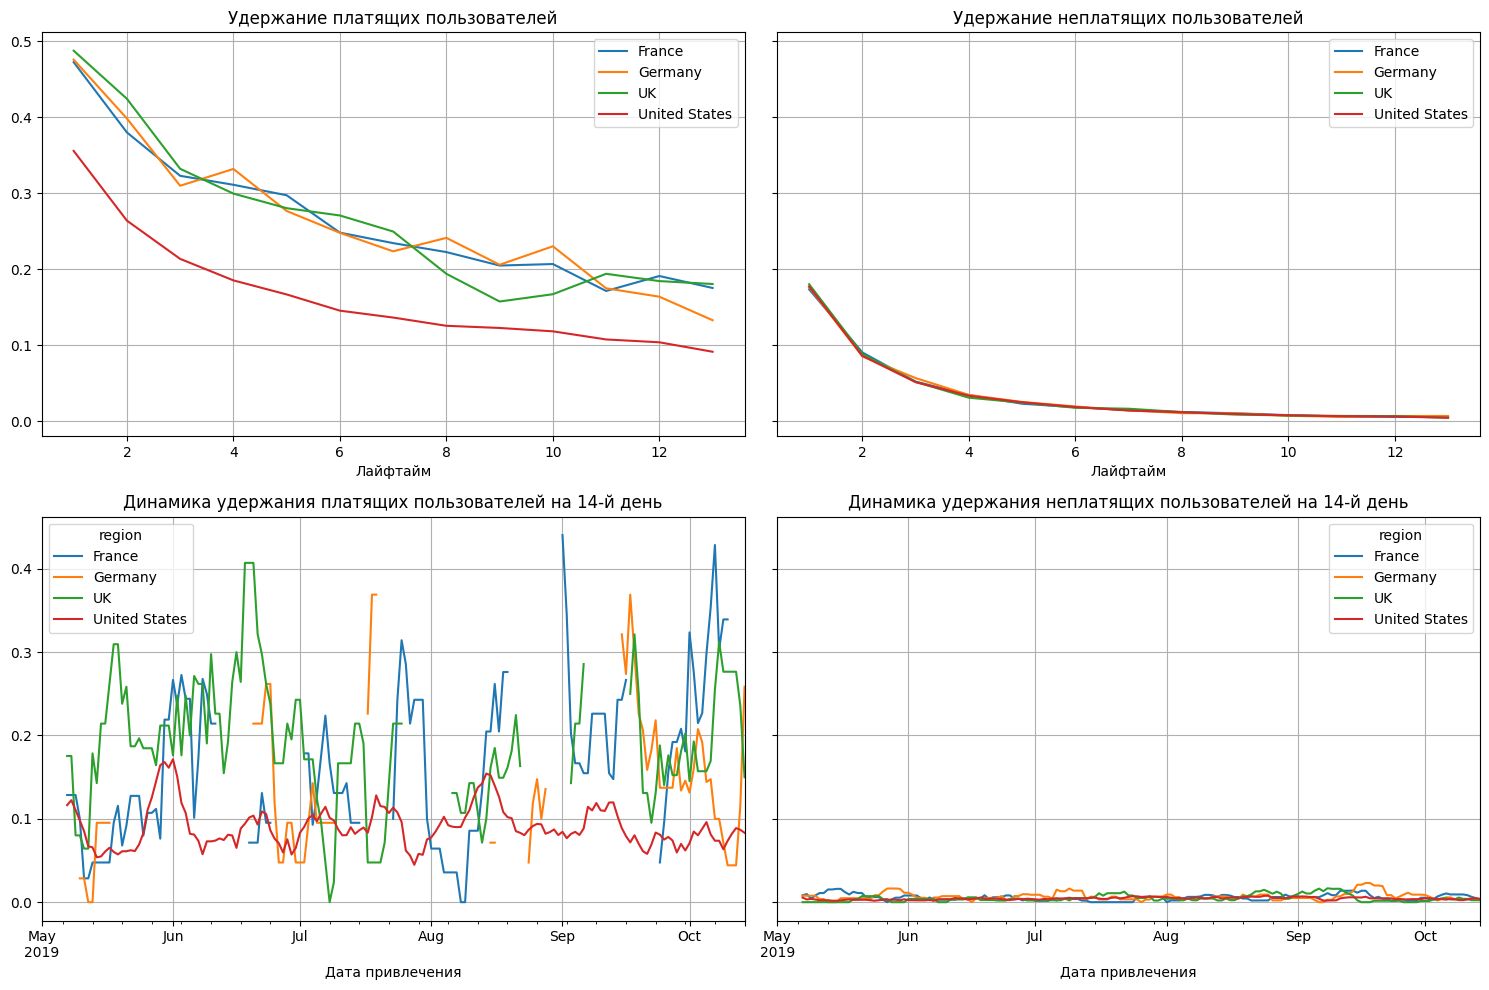

In [137]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

***Вывод:***   
первая тревожная ласточка - удержание платящих пользователей в США ниже чем в Европе.

Посмотрим окупаемость с разбивкой по странам:

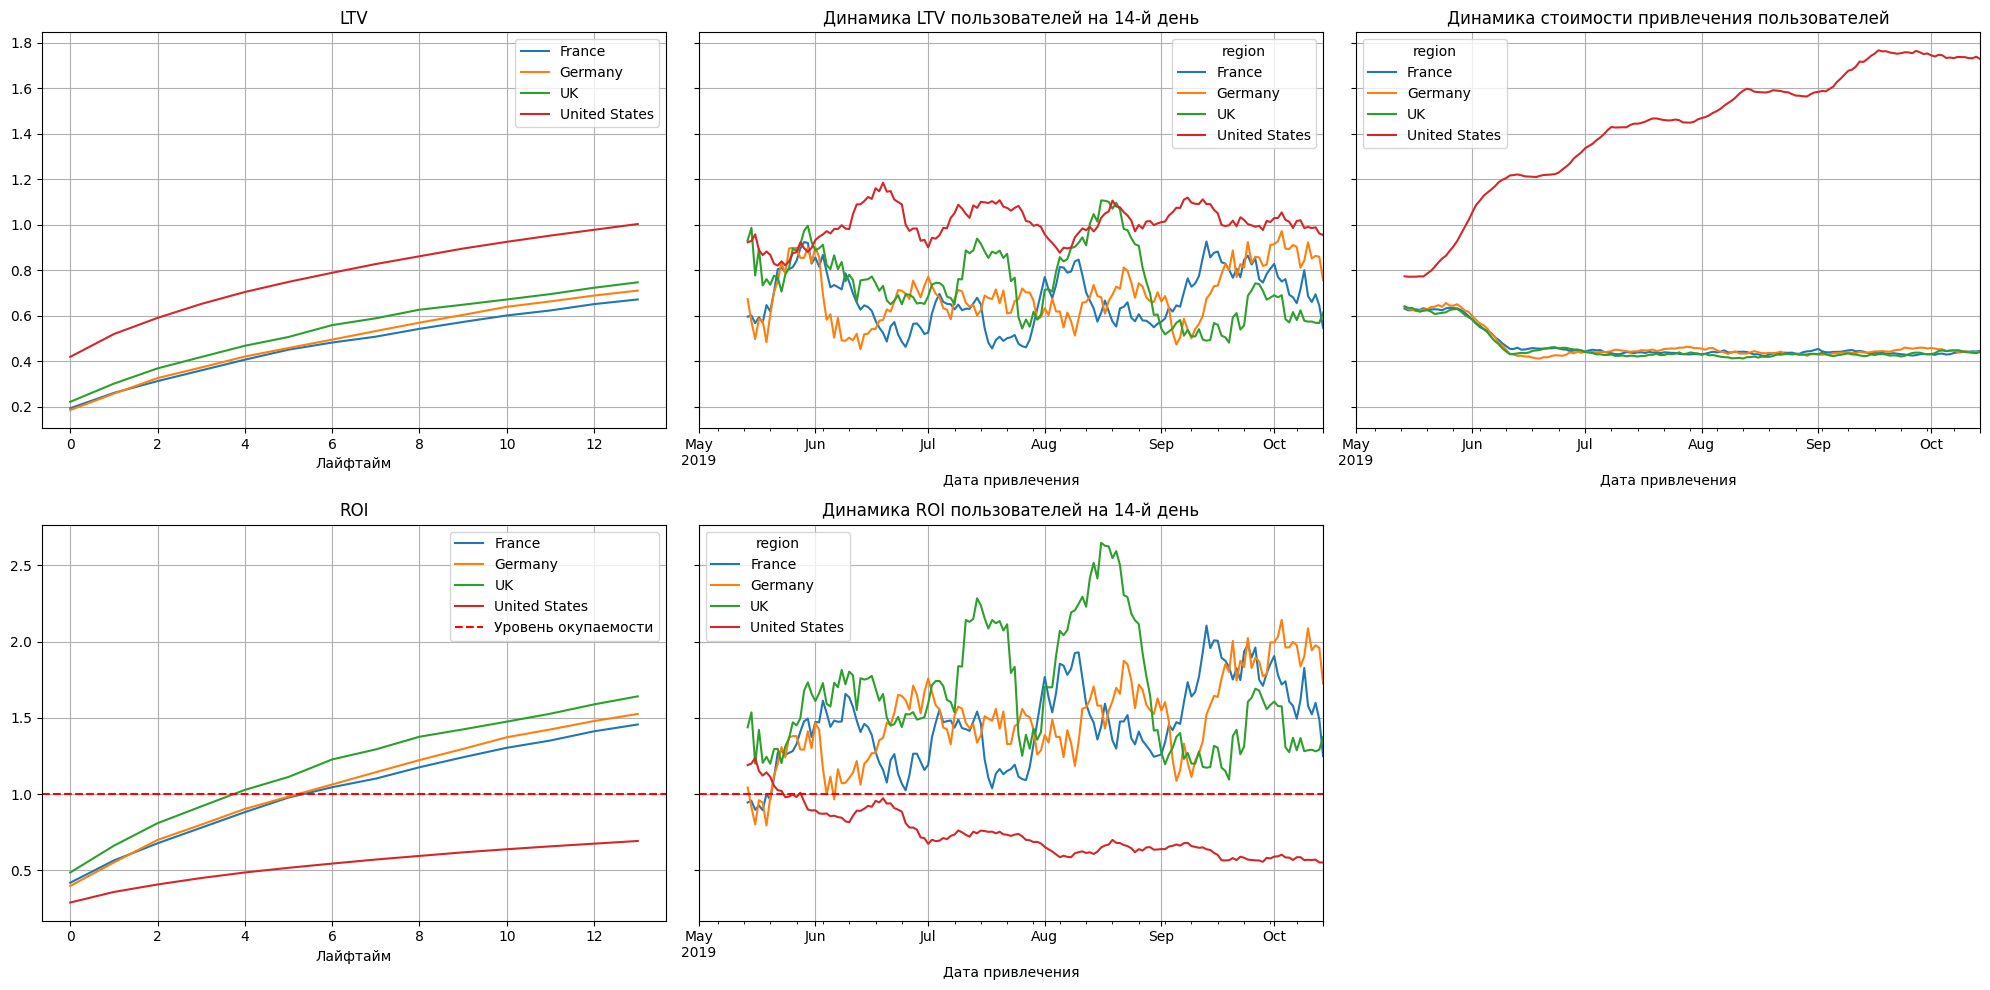

In [138]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

***Вывод:***   
графики наглядно показывают фиаско приложения в США. Несмотря на более высокий чем в Европе LTV, США не выходят на уровень окупаемости ввиду необычайно высокой стоимости привлечения. На начало исследуемого периода, в мае 2019 года, стоимость привлечения в США была лишь ненамного выше, чем в Европе (0.8 и 0.6 соответственно), но далее стоимость привлечения в Европе снизилась до 0.4 и с июня стабильно держалась на этом уровне, в то время как в США каждый месяц происходил скачкообразный рост вплоть до 1.7 в середине сентября. В динамике ROI прослеживается рост показателя для Европы и падение для США.

### Выводы:

### 1. Выявлены источники убытков компании:

1. Основные расходы компании идут рекламу на каналы FaceBoom и TipTop:
Общая сумма затрат на маркетинг 105497, из них больше половины на канал TipTop - 54751.3 и треть FaceBoom - 32445.6.
При этом TipTop и FaceBoom возглавляют тройку убыточных каналов.
2. Не окупается рекламная компания в США - в этом регионе стоимость привлечения пользователей слишком высокая.
3. На конец второй недели не окупается реклама для устройств Mac и iPhone, Android показывает окупаемость 0.9 с перспективой окупаемости к концу третьей недели.

### 2. Рекомендации для отдела маркетинга:

1. В первую очередь рассмотреть сокращение рекламы на FaceBoom и TipTop. Несмотря на высокую конверсию, основной убыток приносят именно эти каналы.
2. Оптимизировать расходы на рекламу в США - хотя этот регион показывает высокую конверсию, но слишком высокая стоимость привлечения плюс низкое удержание ставят под вопрос целесообразность рекламировать приложение в этой стране. 
3. Изучить причины неэффективности рекламы для Mac и iPhone и низкой эффективности для Android. Вероятно это связано с техническими особенностями показов на этих устройствах и требуется доработка маркетинговой воронки или самого приложения.
4. Рассмотреть увеличение рекламного бюджета для прибыльных рекламных каналов (перечислены в порядке убывания):  YRabbit, MediaTornado, LambdaMediaAds, RocketSuperAds, LeapBob, OppleCreativeMedia, WahooNetBanner,  MediaTornado. Так же принять во внимание конверсию этих каналов:
- низкая конверсия (ниже 0.05) - OppleCreativeMedia, LeapBob, MediaTornado, YRabbit
- средняя конверсия (от 0.05 до 0.10) - WahooNetBanner, RocketSuperAds, TipTop
- высокая конверсия (выше 0.10) - LambdaMediaAds,AdNonSense, FaceBoom

Ввиду вышеперечисленного особо рекомендутся подробнее рассмотреть увеличение рекламы на канале LambdaMediaAds